In [1]:
import gpt4all

In [2]:
gptj = gpt4all.GPT4All("ggml-gpt4all-j-v1.3-groovy.bin")

Found model file at  C:\\\\Users\\\\user\\\\.cache\\\\gpt4all\\ggml-gpt4all-j-v1.3-groovy.bin


In [3]:
import torch
# import torchvision
torch.cuda.is_available()

True

In [4]:
import sys,time,os
import pygame
from IPython.display import Audio, display
from rich import print
import re


def playmusic():
  # Load the music file
  music = Audio('/content/Free Epic Music.mp3')
  # Play the music automatically
  display(music)

def typewriter(message):
  for char in message:
    sys.stdout.write(char)
    sys.stdout.flush()
    if char!="\n":
      time.sleep(0.05)
    else:
      time.sleep(1)

def prompt_gpt():

    output = ""
    intro_remove = "Describe without introduction."
    no_code = "Please do not provide any code."
    game_type = "\nThe game should be like flappy bird game type."
    # game_description = "Generate a title for the game, provide a background of the game, describe the main character, and provide a description of the obstacles in point form."
    game_description ="""Generate a game description with the following details:
    Title of the game:
    Background wallpaper of the game:
    Description of main character:
    Obstacle: """
    print('\n\nGenerate Your Game Buddy!')

    user_input = input(">>> ")
    if user_input.lower() != 'q':
        prompt = intro_remove + " " + no_code + "\n" + user_input + "\n" + game_description + game_type
        messages = [{"role": "user", "content": prompt}]
        response = gptj.chat_completion(messages)
        output = response['choices'][0]['message']['content']

    return output


def extract_information(string_gpt):
    title_match = re.search(r'Title of the game(:| is) (.*?)\n(?=.)', string_gpt)
    background_match = re.search(r'Background wallpaper of the game(:| is) (.*?)\n(?=.)', string_gpt)
    # character_match = re.search(r'Main character(:| is) (.*?)\n(?=.)', string_gpt)
    desc_match = re.search(r'Description of main character(:| is) (.*?)\n(?=.)', string_gpt, re.DOTALL)
    obstacles_match = re.search(r'Obstacle(:| is) (.*?)\.', string_gpt)

    if title_match:
      title = title_match.group(2).strip()
    else:
        title = ""

    if background_match:
        background = background_match.group(2).strip()
    else:
        background = ""

    # if character_match:
    #     character = character_match.group(2).strip()
    # else:
    #     character = ""

    if desc_match:
        desc = desc_match.group(2).strip()
    else:
        desc = ""

    if obstacles_match:
      obstacles = obstacles_match.group(2).strip()
    else:
      obstacles = ""

    return title,background,desc,obstacles



# def extract_info(string_gpt):


pygame 2.4.0 (SDL 2.26.4, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
print('''                            ☆ （ • •）☆
                               ╔uu══════════════════╗☆
                                  WELCOME TO FLAPPY
                                    GAME GENERATOR
                               ╚══════nn════════════╝''')

message = "\nAttention gamers! Your dream game awaits, and we're here to bring it to life.\nImagine a world where your creative vision is transformed into a captivating reality.\nFrom breathtaking visuals to immersive gameplay, we'll craft an experience that exceeds your expectations.\nWith close collaboration and your valuable input, together we'll embark on an unforgettable journey to redefine the gaming landscape.\nGet ready to see your dreams become a gaming masterpiece.\nYour game awaits!"
typewriter(message)
gpt_prompt = prompt_gpt()

☆ （ • •）☆
                               ╔uu══════════════════╗☆
                                  WELCOME TO FLAPPY
                                    GAME GENERATOR
                               ╚══════nn════════════╝


Attention gamers! Your dream game awaits, and we're here to bring it to life.
Imagine a world where your creative vision is transformed into a captivating reality.
From breathtaking visuals to immersive gameplay, we'll craft an experience that exceeds your expectations.
With close collaboration and your valuable input, together we'll embark on an unforgettable journey to redefine the gaming landscape.
Get ready to see your dreams become a gaming masterpiece.
Your game awaits!

Generate Your Game Buddy!

### Instruction: 
            The prompt below is a question to answer, a task to complete, or a conversation 
            to respond to; decide which and write an appropriate response.
            
### Prompt: 
Describe without introduction. Please do not provide any code.
create a game with technology theme
Generate a game description with the following details:
    Title of the game:
    Background wallpaper of the game:
    Description of main character:
    Obstacle: 
The game should be like flappy bird game type.
### Response:
 
Title of the game: "Flappy Bird"
Background wallpaper of the game: A colorful and vibrant background with a bird flying through the air.
Description of main character: A bird with a small, yellow beak and wings.
Obstacle: A series of pipes that the bird must avoid while flying.
Gameplay: The player controls the bird by tapping on different areas of its body to make it fly up, down or left and right. The bird can collect coins by hitting the pipes and avoi

In [6]:
t, background_prompt, character_prompt, obstacle_prompt = extract_information(gpt_prompt)
print("\n",t)
background_prompt = (background_prompt)
# main_char = print("\n",c)
character_prompt = (character_prompt)
obstacle_prompt = (obstacle_prompt)

print(background_prompt)
print(character_prompt)
print(obstacle_prompt)


"Flappy Bird"

A colorful and vibrant background with a bird flying through the air.

A bird with a small, yellow beak and wings.

A series of pipes that the bird must avoid while flying

In [7]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
vae\diffusion_pytorch_model.safetensors not found


In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def generate_and_save_image(prompt, style_choice, filename):
    prompt_with_style = f"{prompt}\nstyle: {style_choice}"
    print(prompt_with_style)
    image = pipe(prompt_with_style).images[0]
    image.save(filename)

    image_array = np.array(image)
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

# User input for choosing the style or type of the images
print("Choose the style or type of the images:")
print("1. Oil painting")
print("2. Watercolor painting")
print("3. Pencil sketch")
print("4. Pixel art")
print("5. Realistic")
style_choice = input("Enter the corresponding number for your choice: ")

if style_choice == "1":
    style = "oil painting"
elif style_choice == "2":
    style = "watercolor painting"
elif style_choice == "3":
    style = "pencil sketch"
elif style_choice == "4":
    style = "Pixel art"
elif style_choice == "5":
    style = "Realistic"
else:
    print("Invalid choice. Using default style.")


Choose the style or type of the images:

1. Oil painting

2. Watercolor painting

3. Pencil sketch

4. Pixel art

5. Realistic

A bird with a small, yellow beak and wings.
style: Realistic

100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


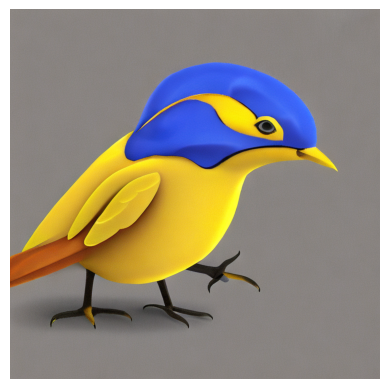

In [10]:
generate_and_save_image(character_prompt, style, "game_character.png")

A colorful and vibrant background with a bird flying through the air.
style: Realistic

100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


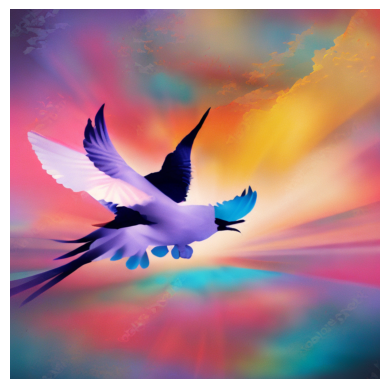

In [11]:
generate_and_save_image(background_prompt, style, "game_background.png")

A series of pipes that the bird must avoid while flying
style: Realistic

100%|██████████| 50/50 [00:16<00:00,  3.12it/s]


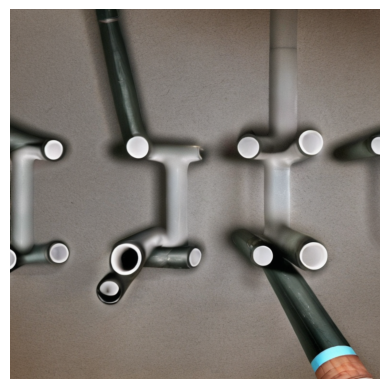

In [12]:
generate_and_save_image(obstacle_prompt, style, "game_obstacle.png")

In [16]:
# Importing Required Modules
from rembg import remove
from PIL import Image
import numpy as np

def remove_bg(image, filename):
  # Store path of the image in the variable input_path
  input_path = image

  # Store path of the output image in the variable output_path
  # output_path = '/content/'+ output +'.png'

  # Processing the image
  input = Image.open(input_path)

  # Removing the background from the given Image
  output = remove(input)

  #Saving the image in the given path
  output.save(filename)


In [17]:
game_char = remove_bg("game_character.png", "game_character_rem.png")

In [23]:
# image_array = np.array(game_char)
# plt.imshow(image_array)
# plt.axis('off')
# plt.show()

In [20]:
def resize_image(input_image_path,output_image_path,size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print(f"The original image size is {width} wide x {height} high")

    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print(f"The resized image size is {width} wide x {height} high")
    resized_image.save(output_image_path)

resize_image('game_character_rem.png', 'game_character_resize.png', (51, 36))
resize_image('game_obstacle.png', 'game_obstacle_resize.png', (150, 560))



The original image size is 768 wide x 768 high

The resized image size is 51 wide x 36 high

The original image size is 768 wide x 768 high

The resized image size is 150 wide x 560 high

In [21]:
import pygame
from pygame.locals import *
import random
from pygame import mixer

pygame.init()

clock = pygame.time.Clock()
fps = 60

screen_width = 764
screen_height = 836

screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Flappy Bird')

#define font
font = pygame.font.SysFont('Bauhaus 93', 60)

#define colours
white = (255, 255, 255)

#define game variables
ground_scroll = 0
scroll_speed = 4
flying = False
game_over = False
pipe_gap = 180
pipe_frequency = 1500 #milliseconds
last_pipe = pygame.time.get_ticks() - pipe_frequency
score = 0
pass_pipe = False

music_list = [
    r"'Choose Your Character!' Fast Fighter-Select Game Music by HeatleyBros.mp3",
    r"'8 Bit Scrap!' Fun Battle Game Music by HeatleyBros.mp3",
    r"'8 Bit Evil!' Royalty Free Halloween Music by HeatleyBros.mp3"
]
# Load a random music file from the list
random_music = random.choice(music_list)
pygame.mixer.music.load(random_music)

# Play the loaded music file indefinitely (-1 means loop forever)
pygame.mixer.music.play(-1)

# music_list = ["'Choose Your Character!' Fast Fighter-Select Game Music by HeatleyBros.mp3","'8 Bit Scrap!' Fun Battle Game Music by HeatleyBros.mp3","'8 Bit Evil!' Royalty Free Halloween Music by HeatleyBros.mp3"]
# mixer.music.load()
# mixer.music.play(-1)
#load images
bg = pygame.image.load('game_background.png')
ground_img = pygame.image.load('ground.png')
button_img = pygame.image.load('restart.png')


#function for outputting text onto the screen
def draw_text(text, font, text_col, x, y):
	img = font.render(text, True, text_col)
	screen.blit(img, (x, y))

def reset_game():
	pipe_group.empty()
	flappy.rect.x = 100
	flappy.rect.y = int(screen_height / 2)
	score = 0
	return score


class Bird(pygame.sprite.Sprite):

	def __init__(self, x, y):
		pygame.sprite.Sprite.__init__(self)
		self.images = []
		self.index = 0
		self.counter = 0
		for num in range (1, 4):
			img = pygame.image.load(f"game_character_resize.png")
			self.images.append(img)
		self.image = self.images[self.index]
		self.rect = self.image.get_rect()
		self.rect.center = [x, y]
		self.vel = 0
		self.clicked = False

	def update(self):

		if flying == True:
			#apply gravity
			self.vel += 0.5
			if self.vel > 8:
				self.vel = 8
			if self.rect.bottom < 768:
				self.rect.y += int(self.vel)

		if game_over == False:
			#jump
			if pygame.mouse.get_pressed()[0] == 1 and self.clicked == False:
				self.clicked = True
				self.vel = -10
			if pygame.mouse.get_pressed()[0] == 0:
				self.clicked = False

			#handle the animation
			flap_cooldown = 5
			self.counter += 1
			
			if self.counter > flap_cooldown:
				self.counter = 0
				self.index += 1
				if self.index >= len(self.images):
					self.index = 0
				self.image = self.images[self.index]


			#rotate the bird
			self.image = pygame.transform.rotate(self.images[self.index], self.vel * -2)
		else:
			#point the bird at the ground
			self.image = pygame.transform.rotate(self.images[self.index], -90)



class Pipe(pygame.sprite.Sprite):

	def __init__(self, x, y, position):
		pygame.sprite.Sprite.__init__(self)
		self.image = pygame.image.load("game_obstacle_resize.png")
		self.rect = self.image.get_rect()
		#position variable determines if the pipe is coming from the bottom or top
		#position 1 is from the top, -1 is from the bottom
		if position == 1:
			self.image = pygame.transform.flip(self.image, False, True)
			self.rect.bottomleft = [x, y - int(pipe_gap / 2)]
		elif position == -1:
			self.rect.topleft = [x, y + int(pipe_gap / 2)]


	def update(self):
		self.rect.x -= scroll_speed
		if self.rect.right < 0:
			self.kill()



class Button():
	def __init__(self, x, y, image):
		self.image = image
		self.rect = self.image.get_rect()
		self.rect.topleft = (x, y)

	def draw(self):
		action = False

		#get mouse position
		pos = pygame.mouse.get_pos()

		#check mouseover and clicked conditions
		if self.rect.collidepoint(pos):
			if pygame.mouse.get_pressed()[0] == 1:
				action = True

		#draw button
		screen.blit(self.image, (self.rect.x, self.rect.y))

		return action



pipe_group = pygame.sprite.Group()
bird_group = pygame.sprite.Group()

flappy = Bird(100, int(screen_height / 2))

bird_group.add(flappy)

#create restart button instance
button = Button(screen_width // 2 - 50, screen_height // 2 - 100, button_img)


run = True
while run:

	clock.tick(fps)

	#draw background
	screen.blit(bg, (0,0))

	pipe_group.draw(screen)
	bird_group.draw(screen)
	bird_group.update()

	#draw and scroll the ground
	screen.blit(ground_img, (ground_scroll, 768))

	#check the score
	if len(pipe_group) > 0:
		if bird_group.sprites()[0].rect.left > pipe_group.sprites()[0].rect.left\
			and bird_group.sprites()[0].rect.right < pipe_group.sprites()[0].rect.right\
			and pass_pipe == False:
			pass_pipe = True
		if pass_pipe == True:
			if bird_group.sprites()[0].rect.left > pipe_group.sprites()[0].rect.right:
				score += 1
				pass_pipe = False
	draw_text(str(score), font, white, int(screen_width / 2), 20)


	#look for collision
	if pygame.sprite.groupcollide(bird_group, pipe_group, False, False) or flappy.rect.top < 0:
		game_over = True
	#once the bird has hit the ground it's game over and no longer flying
	if flappy.rect.bottom >= 768:
		game_over = True
		flying = False


	if flying == True and game_over == False:
		#generate new pipes
		time_now = pygame.time.get_ticks()
		if time_now - last_pipe > pipe_frequency:
			pipe_height = random.randint(-100, 100)
			btm_pipe = Pipe(screen_width, int(screen_height / 2) + pipe_height, -1)
			top_pipe = Pipe(screen_width, int(screen_height / 2) + pipe_height, 1)
			pipe_group.add(btm_pipe)
			pipe_group.add(top_pipe)
			last_pipe = time_now

		pipe_group.update()

		ground_scroll -= scroll_speed
		if abs(ground_scroll) > 35:
			ground_scroll = 0
	

	#check for game over and reset
	if game_over == True:
		if button.draw():
			game_over = False
			score = reset_game()


	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			run = False
		if event.type == pygame.MOUSEBUTTONDOWN and flying == False and game_over == False:
			flying = True

	pygame.display.update()

pygame.quit()
